In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


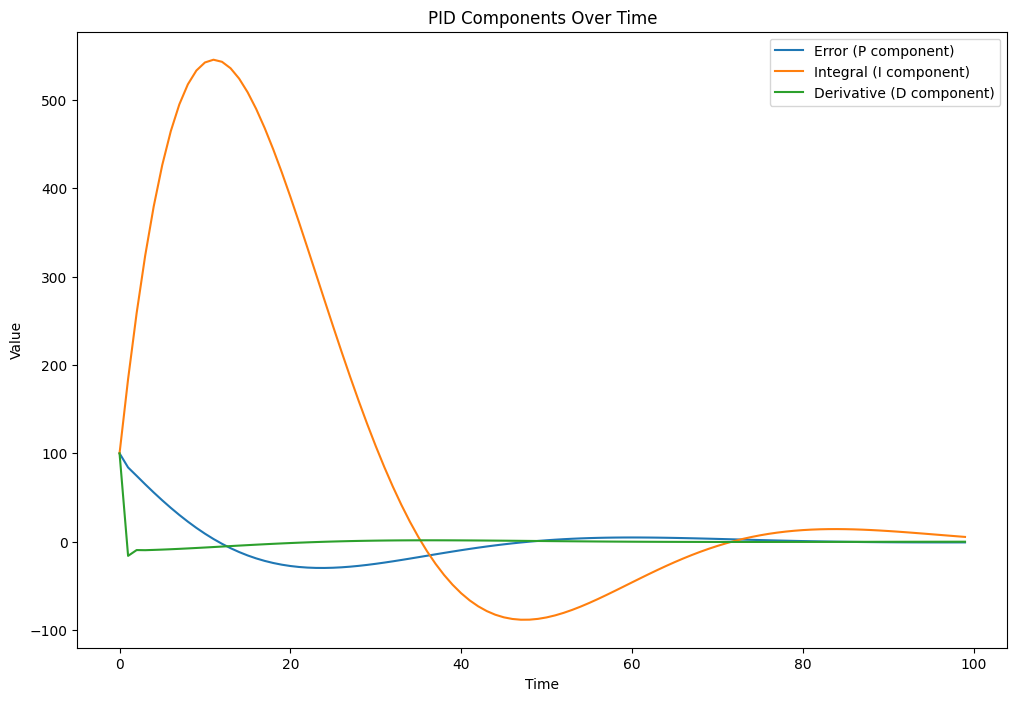

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class PID:
    def __init__(self, P=0.2, I=0.0, D=0.0):
        self.Kp = P
        self.Ki = I
        self.Kd = D
        self.integral = 0
        self.prev_error = 0

    def update(self, setpoint, pv, dt=1):
        error = setpoint - pv
        self.integral += error * dt
        derivative = (error - self.prev_error) / dt
        output = self.Kp * error + self.Ki * self.integral + self.Kd * derivative
        self.prev_error = error
        return output, error, self.integral, derivative

# シミュレーションパラメータ
setpoint = 100  # 目標値
pv = 0  # 初期プロセス変数
dt = 1  # 時間間隔
pid = PID(P=0.1, I=0.01, D=0.05)

# シミュレーションの実行
time = np.arange(0, 100, dt)
outputs = []
errors = []
integrals = []
derivatives = []

for t in time:
    output, error, integral, derivative = pid.update(setpoint, pv, dt)
    pv += output  # システムの応答を更新
    outputs.append(output)
    errors.append(error)
    integrals.append(integral)
    derivatives.append(derivative)

# グラフの表示
plt.figure(figsize=(12, 8))
plt.plot(time, errors, label='Error (P component)')
plt.plot(time, integrals, label='Integral (I component)')
plt.plot(time, derivatives, label='Derivative (D component)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('PID Components Over Time')
plt.legend()
plt.show()
